In [1]:
import os

import sys
sys.path.append(os.path.join(".."))

import cv2

import numpy as np

from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel

import matplotlib.pyplot as plt

In [3]:
filepath = os.path.join("..", "..", "..", "cds-vis-data", "data", "img", "trex.png")

In [4]:
image = cv2.imread(filepath)

## Blurring with convolutional kernels

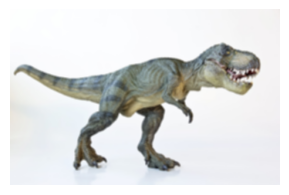

In [10]:
show(cv2.blur(image, (3,3)))

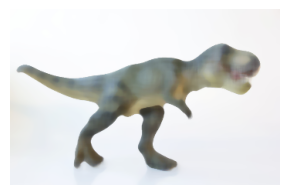

In [15]:
show(cv2.medianBlur(image, 11))

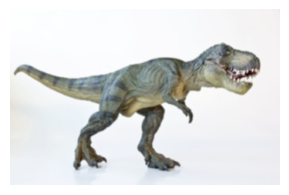

In [21]:
show(cv2.GaussianBlur(image, (3,3), 0))

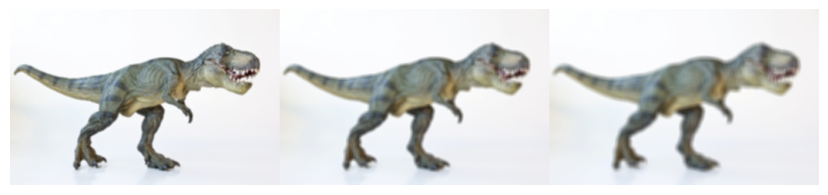

In [23]:
blurred_stack = np.hstack([
    cv2.blur(image, (3,3)),
    cv2.blur(image, (5,5)),
    cv2.blur(image, (7,7))
])
show(blurred_stack)

## Thresholding

In [24]:
image = cv2.imread(filepath)

In [26]:
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

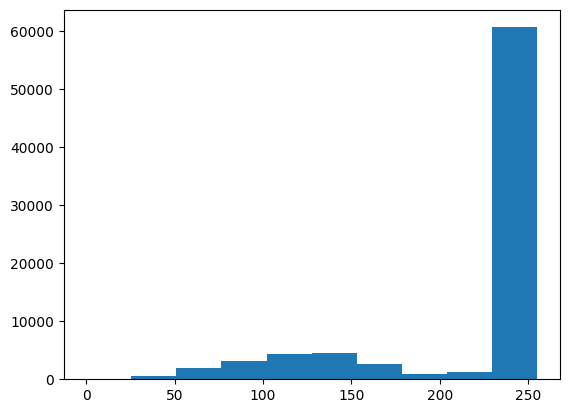

In [28]:
plt.hist(grey_image.flatten(), 10)
plt.show()

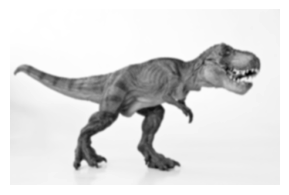

In [30]:
blurred = cv2.GaussianBlur(grey_image, (5,5), 0)
show_channel(blurred)

In [38]:
_, binary_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)

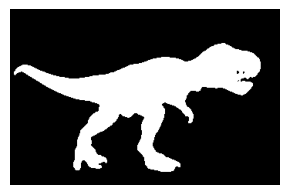

In [39]:
show_channel(binary_image)

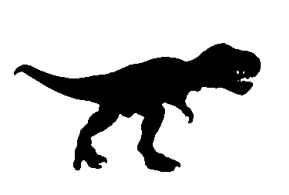

In [40]:
show_channel(cv2.bitwise_not(binary_image))

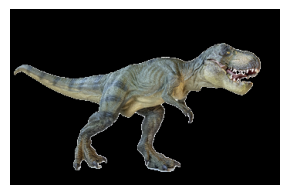

In [43]:
show(cv2.bitwise_and(image, image, mask=binary_image))

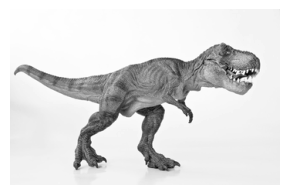

In [44]:
show_channel(grey_image)

## Sobel

In [46]:
sobel_horizontal = cv2.Sobel(grey_image, cv2.CV_64F, 1, 0)

sobel_vertical = cv2.Sobel(grey_image, cv2.CV_64F, 0, 1)

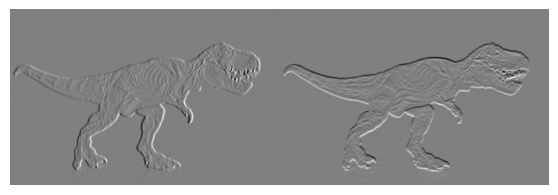

In [48]:
edges = np.hstack([
    sobel_horizontal,
    sobel_vertical
])

show_channel(edges)